In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Экзамен
# Коротков М.А. ПМ18-4
# датасет 24 - https://www.kaggle.com/nandvard/microsoft-data-science-capstone
# Вариант 2 - Визуализация

In [2]:
df_X_train = pd.read_csv('Training_values.csv')
df_Y_train = pd.read_csv('Training_labels.csv')
df=pd.concat([df_X_train, df_Y_train], axis=1)  ## для удобства анализа объединим в 1 датасет

In [3]:
df.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,row_id,heart_disease_mortality_per_100k
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,...,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,0,312
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,...,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,1,257
2,4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,...,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,4,195
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,...,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b,5,218
4,6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,...,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a,6,355


Заметим, что в датасете столбец row_id присутствует дважды. Кроме того, данный столбец не имеет смысла для модели, удалим оба столбца.

In [4]:
df.drop(['row_id','row_id'], axis =1, inplace =True)

In [5]:
df.head()

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,...,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,...,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,312
1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,...,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,257
2,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,...,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,195
3,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,...,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b,218
4,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,...,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a,355


In [6]:
df.info()  ## просмотрим информацию о заполненных значениях и типе данных в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 34 columns):
area__rucc                                          3198 non-null object
area__urban_influence                               3198 non-null object
econ__economic_typology                             3198 non-null object
econ__pct_civilian_labor                            3198 non-null float64
econ__pct_unemployment                              3198 non-null float64
econ__pct_uninsured_adults                          3196 non-null float64
econ__pct_uninsured_children                        3196 non-null float64
demo__pct_female                                    3196 non-null float64
demo__pct_below_18_years_of_age                     3196 non-null float64
demo__pct_aged_65_years_and_older                   3196 non-null float64
demo__pct_hispanic                                  3196 non-null float64
demo__pct_non_hispanic_african_american             3196 non-null float64
demo__pc

Заметим, что в столбце health__homicides_per_100k более 50% пропусков. Восстановление не имеет смысла, удалим данный столбец

In [7]:
df.drop(['health__homicides_per_100k'], axis =1, inplace =True)

Далее проведем работу с остальными колонками, содержащими пропуски. Если количество пропусков превысит 25% признак удалим, в противном случае будем заполнять пропуски

In [8]:
cols_del = []
cols_change = []

for i in df.columns:
    if df[i].isna().sum() > 0.25*len(df):
        cols_del.append(i)
    elif df[i].isna().sum() > 0:
        cols_change.append(i)
df = df.drop(cols_del, axis = 1)

In [9]:
cols_change

['econ__pct_uninsured_adults',
 'econ__pct_uninsured_children',
 'demo__pct_female',
 'demo__pct_below_18_years_of_age',
 'demo__pct_aged_65_years_and_older',
 'demo__pct_hispanic',
 'demo__pct_non_hispanic_african_american',
 'demo__pct_non_hispanic_white',
 'demo__pct_american_indian_or_alaskan_native',
 'demo__pct_asian',
 'health__pct_adult_obesity',
 'health__pct_adult_smoking',
 'health__pct_diabetes',
 'health__pct_low_birthweight',
 'health__pct_physical_inacticity',
 'health__air_pollution_particulate_matter',
 'health__motor_vehicle_crash_deaths_per_100k',
 'health__pop_per_dentist',
 'health__pop_per_primary_care_physician']

In [10]:
df.nunique()

area__rucc                                             9
area__urban_influence                                 12
econ__economic_typology                                6
econ__pct_civilian_labor                             381
econ__pct_unemployment                               142
econ__pct_uninsured_adults                           340
econ__pct_uninsured_children                         213
demo__pct_female                                     167
demo__pct_below_18_years_of_age                      218
demo__pct_aged_65_years_and_older                    249
demo__pct_hispanic                                   464
demo__pct_non_hispanic_african_american              502
demo__pct_non_hispanic_white                         706
demo__pct_american_indian_or_alaskan_native          209
demo__pct_asian                                      132
demo__pct_adults_less_than_a_high_school_diploma    2612
demo__pct_adults_with_high_school_diploma           2689
demo__pct_adults_with_some_coll

In [11]:
for col in cols_change:
    try:
        df[col] = df[col].fillna(float(round(df[col].mean())))  ## заполняем числовые данные средним
    except:
        df[col] = df[col].fillna(df[col].value_counts().idxmax()) ## заполняем категориальные данные самым частым

In [12]:
for col in df.columns:
    print(f"{df[col].isna().sum()} NaN elements in {col} feature")

0 NaN elements in area__rucc feature
0 NaN elements in area__urban_influence feature
0 NaN elements in econ__economic_typology feature
0 NaN elements in econ__pct_civilian_labor feature
0 NaN elements in econ__pct_unemployment feature
0 NaN elements in econ__pct_uninsured_adults feature
0 NaN elements in econ__pct_uninsured_children feature
0 NaN elements in demo__pct_female feature
0 NaN elements in demo__pct_below_18_years_of_age feature
0 NaN elements in demo__pct_aged_65_years_and_older feature
0 NaN elements in demo__pct_hispanic feature
0 NaN elements in demo__pct_non_hispanic_african_american feature
0 NaN elements in demo__pct_non_hispanic_white feature
0 NaN elements in demo__pct_american_indian_or_alaskan_native feature
0 NaN elements in demo__pct_asian feature
0 NaN elements in demo__pct_adults_less_than_a_high_school_diploma feature
0 NaN elements in demo__pct_adults_with_high_school_diploma feature
0 NaN elements in demo__pct_adults_with_some_college feature
0 NaN elements

# Перейдем непосредственно к визуализации данных

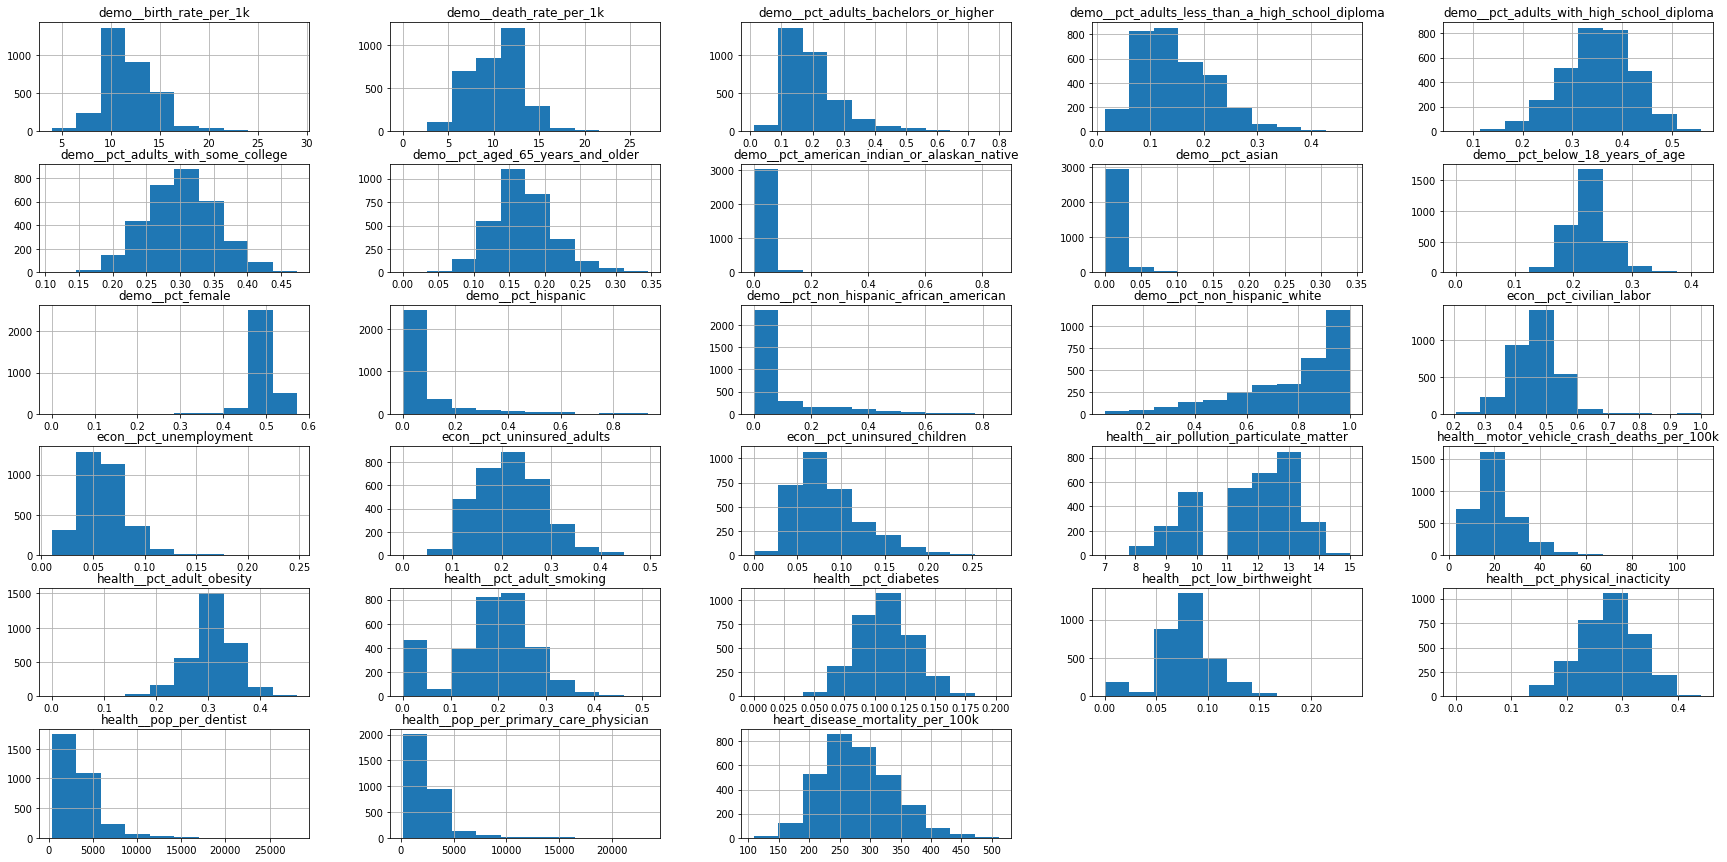

In [15]:
df.hist()
fig = plt.gcf()
fig.set_size_inches(30,15)

Из гистограмм числовых признаков можно сделать вывод о нормальности распределения некоторых признаков - demo_pctadultslessthanahighschooldiploma, demo_pctadultswithsome_college, health_pctdiabetes и тд. Такой вывод сделан тк их гистограмма напоминает следующую:

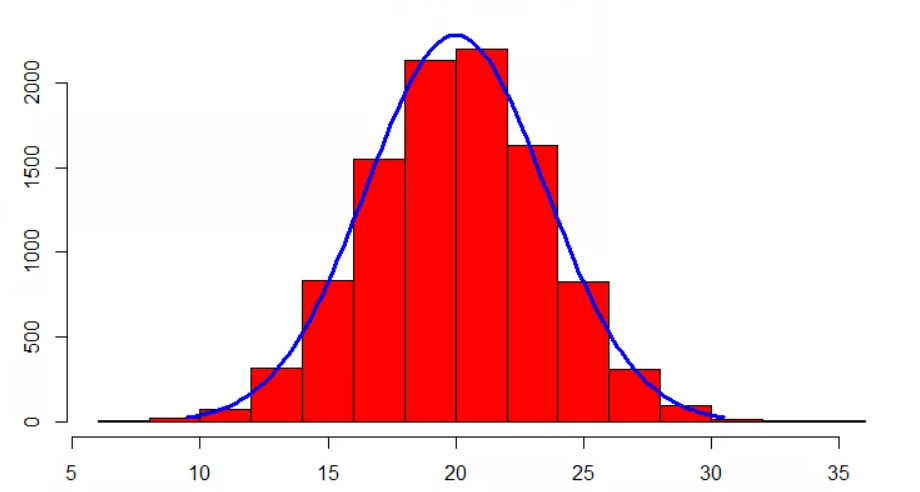

Также в некоторых данных можно заметить наличие логнормального распределения, для которого характерна гистограмма:

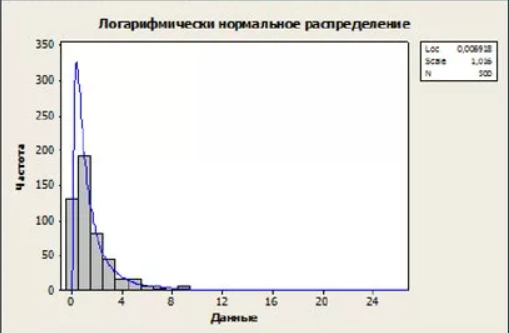

Среди таких признаков: health_popper_dentist и health_popperprimarycare_physician. Описание каждого из признаков можно посмотреть по ссылке на сайт kaggle в начале работы. 

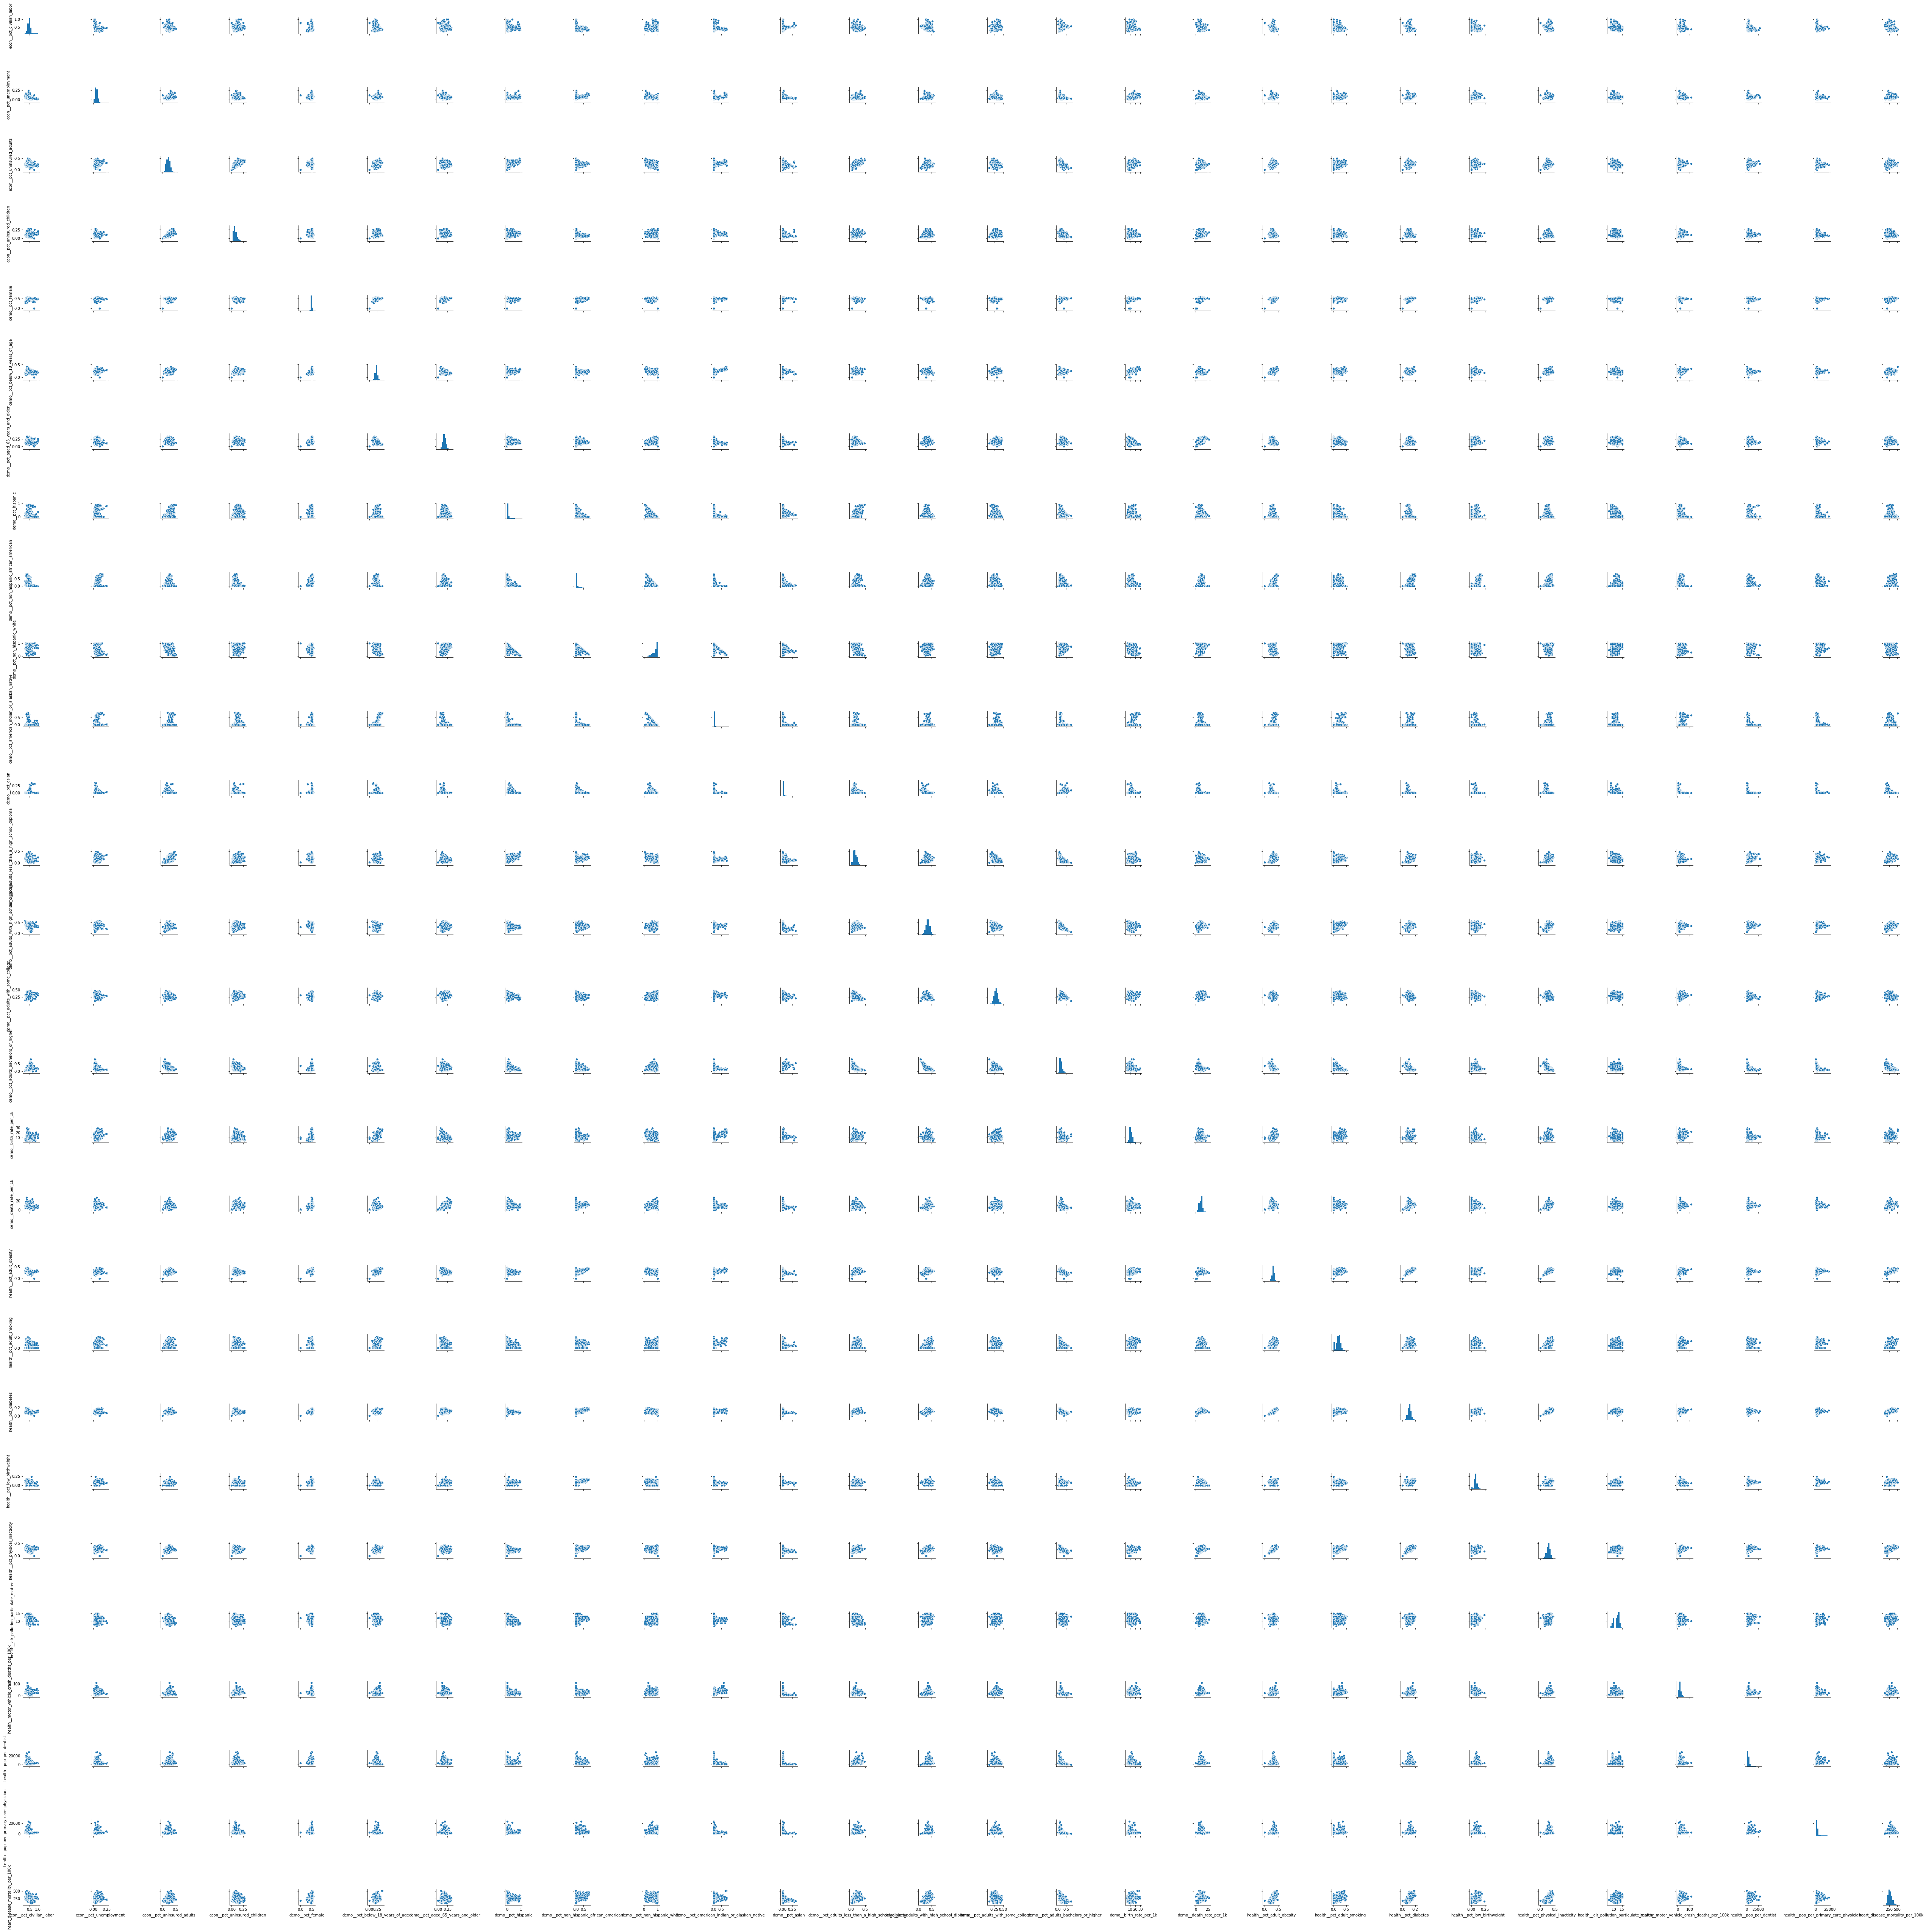

In [16]:
sns.pairplot(df)  ## оидн из наиболее популярных методов визуализации, однако в данной работе мало, что показывающий

In [17]:
categorical_columns= [column for column in df.columns if df[column].dtype == 'object']
numerical_columns = [column for column in df.columns if df[column].dtype != 'object']

# Диаграмма рассеяния для числовых признаков

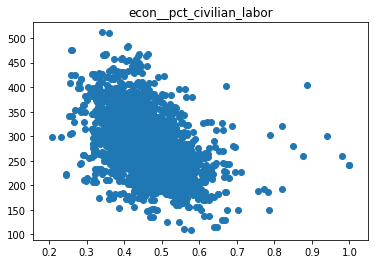

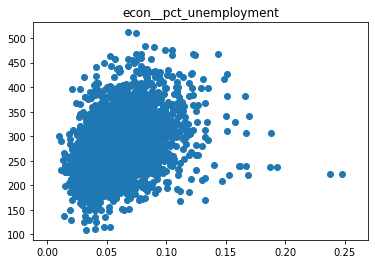

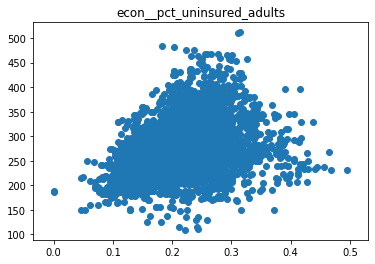

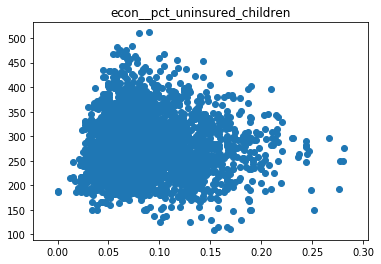

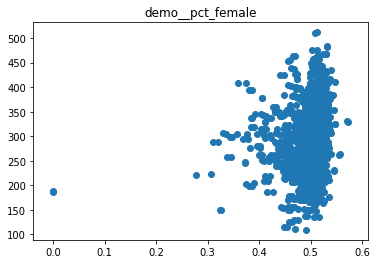

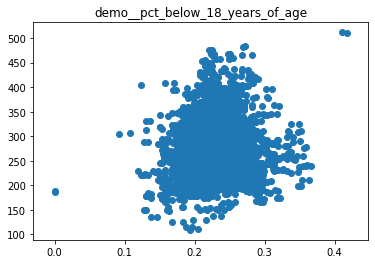

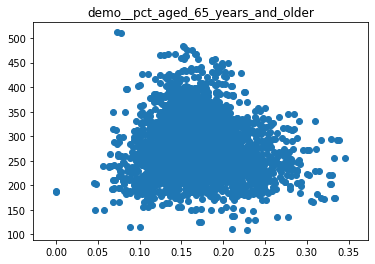

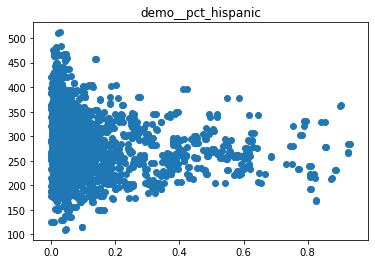

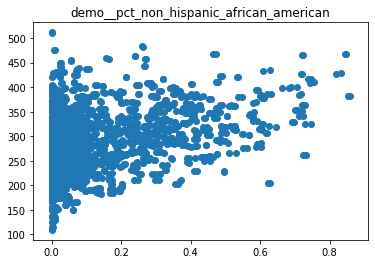

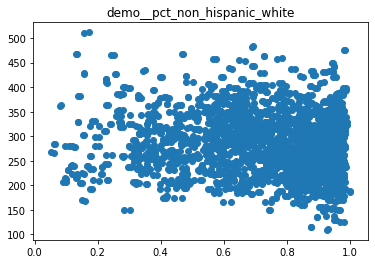

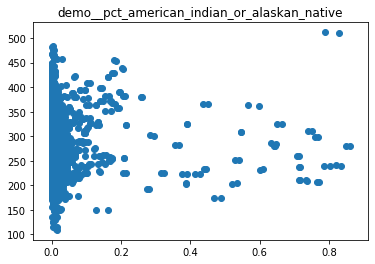

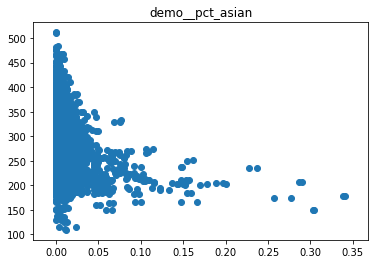

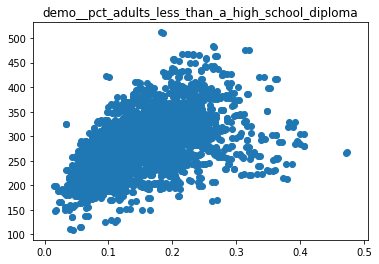

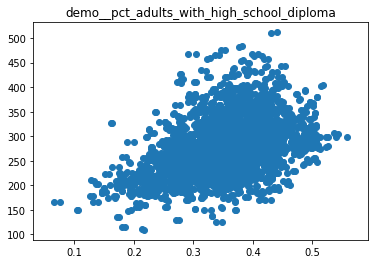

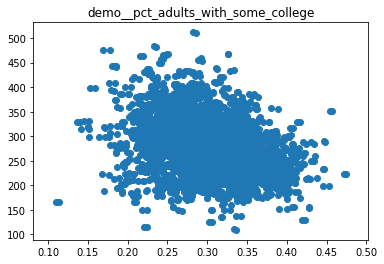

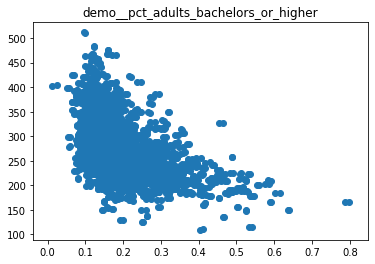

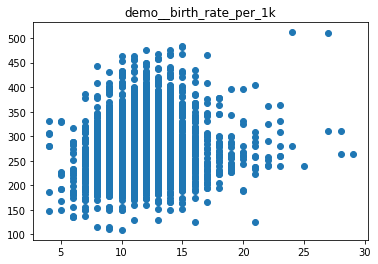

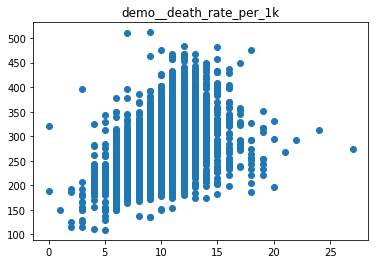

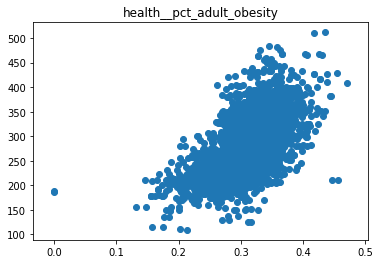

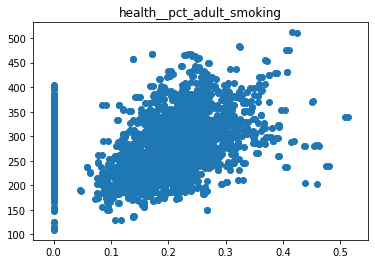

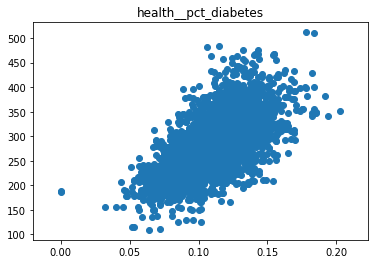

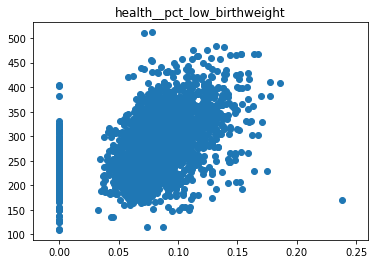

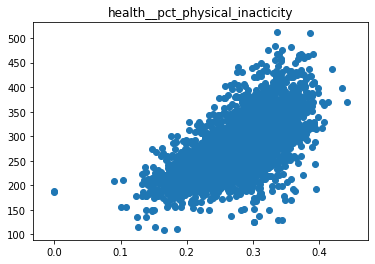

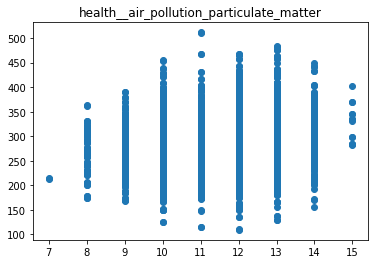

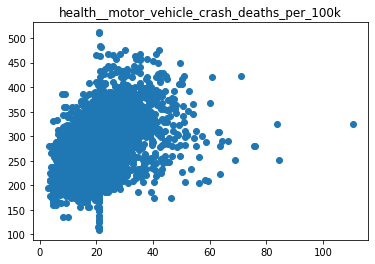

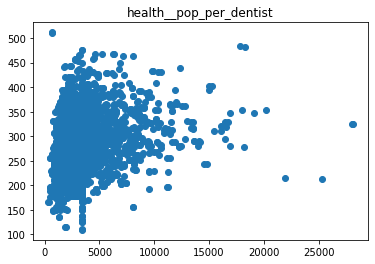

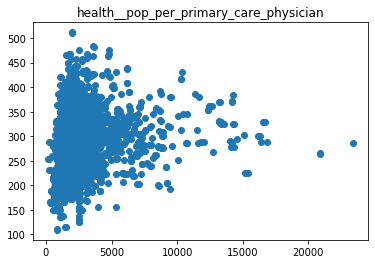

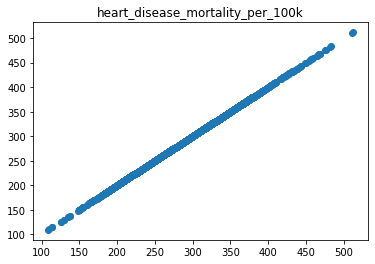

In [23]:
for col in numerical_columns:
    plt.scatter(df[col],df['heart_disease_mortality_per_100k'])
    plt.title(str(col))
    plt.show()

Большинство из признаков близки к линейному распределению. Посмотрим как модель покажет себя на этих данных. При попытке улучшения можно будет прибегнуть к полиномиальным признакам

# Корреляционная матрица

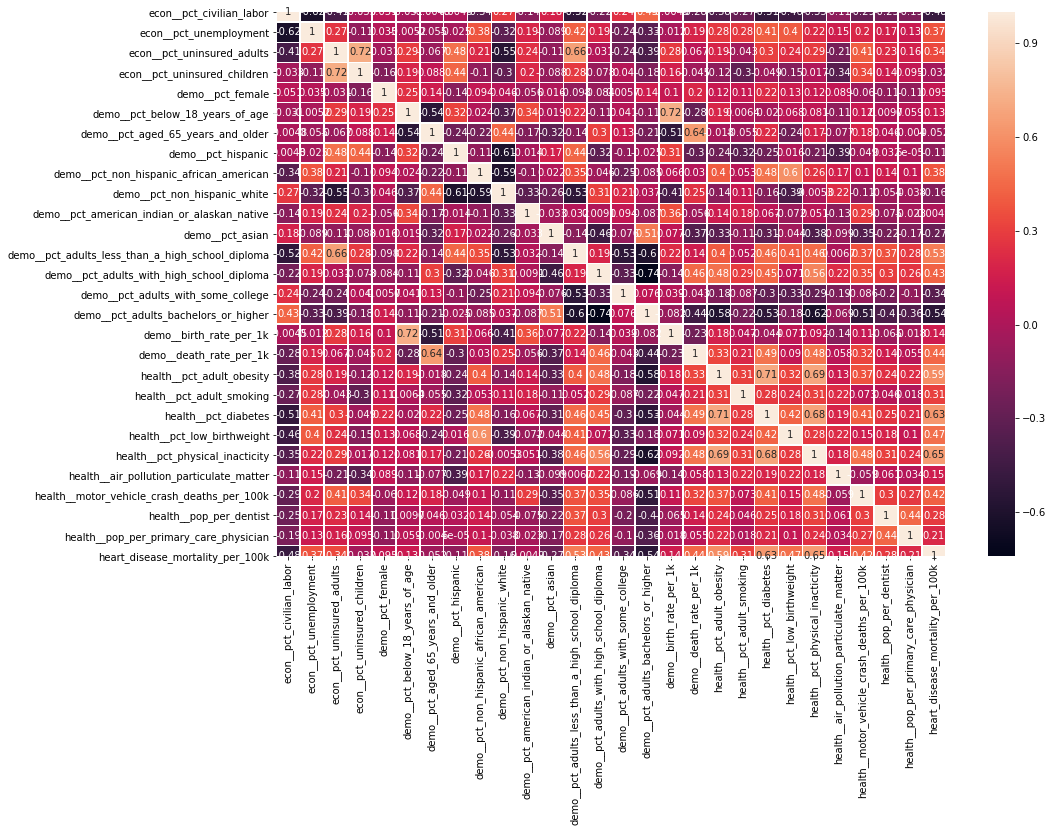

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(df.corr(), ax=ax,linewidths=.5,annot = True)

Сильно коррелирующих между собой признаков выявлено не было. Максимальный коэффициент корреляции 0.72 между рождаемостью на 1000 человек населения и процентом населения в возрасте до 18 лет 

# Ящиковые диаграммы - поиск аномалий таргета

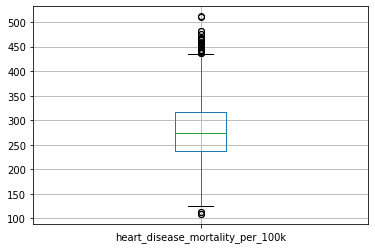

In [25]:
df.boxplot('heart_disease_mortality_per_100k')

Заметим, что в столбце, содержащем информацию о ценах, присутствуют выбросы, будет разумным исправить наш набор данных, взяв данные в диапазоне от 25%-1.5*IQR до 75%+1.5*IQR, где IQR - межквартильный размах

In [26]:
IQR = df['heart_disease_mortality_per_100k'].quantile(0.75) - df['heart_disease_mortality_per_100k'].quantile(0.25)
df = df[(df['heart_disease_mortality_per_100k'] < (df['heart_disease_mortality_per_100k'].quantile(0.75)+1.5*IQR)) & (df['heart_disease_mortality_per_100k'] > (df['heart_disease_mortality_per_100k'].quantile(0.25)-1.5*IQR))]
len(df) ## длина датасета уменьшилась

3164

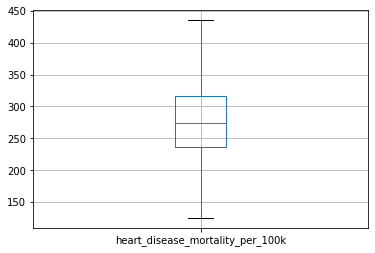

In [27]:
df.boxplot('heart_disease_mortality_per_100k')

Text(0.5, 1.0, 'heart_disease_mortality_per_100k by econ__economic_typology')

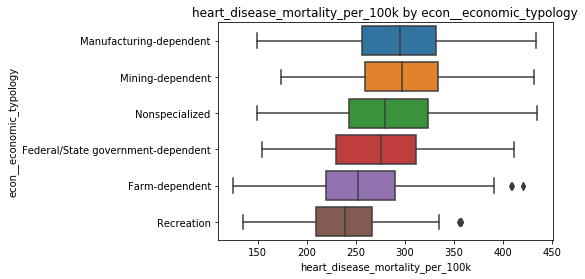

In [32]:
gb_price = sns.boxplot(y = 'econ__economic_typology',x = 'heart_disease_mortality_per_100k', data = df)
gb_price.set_title('heart_disease_mortality_per_100k by econ__economic_typology')

# Другие способы визуализации данных

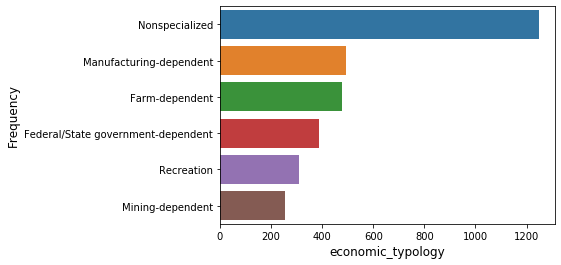

In [29]:
plt.figure()
sns.barplot(y=df.econ__economic_typology.value_counts().index, x=df.econ__economic_typology.value_counts())
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('economic_typology', fontsize=12)
plt.show()

В наборе данных преобладает неспециализированный тип экономики

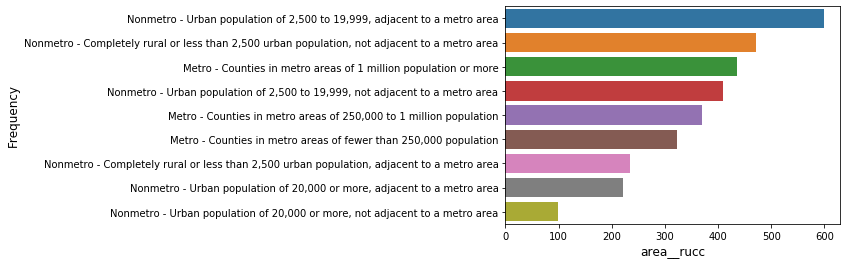

In [30]:
plt.figure()
sns.barplot(y=df.area__rucc.value_counts().index, x=df.area__rucc.value_counts())
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('area__rucc', fontsize=12)
plt.show()

Наиболее популярно - городское население от 2500 до 19 999 человек, прилегающее к району метро

# Работа с моделью

Сначала переведем категориальные признаки в числовые. Использовать будем Label Encoder. При использовании One Hote датасет примет огромное значение

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

C:\MAX\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
df.head()

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,...,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,2,11,2,0.408,0.057,0.254,0.066,0.516,0.235,0.176,...,0.230,0.131,0.089,0.332,13.0,15.09,1650.0,1489.0,0,312
1,2,11,3,0.556,0.039,0.260,0.143,0.503,0.272,0.101,...,0.190,0.090,0.082,0.265,10.0,19.79,2010.0,2480.0,0,257
2,0,0,4,0.541,0.057,0.070,0.023,0.522,0.179,0.115,...,0.156,0.084,0.098,0.209,10.0,3.14,629.0,690.0,1,195
3,5,6,4,0.500,0.061,0.203,0.059,0.525,0.200,0.164,...,0.000,0.104,0.058,0.238,13.0,21.00,1810.0,6630.0,1,218
4,6,9,4,0.471,0.050,0.225,0.103,0.511,0.237,0.171,...,0.234,0.137,0.070,0.290,9.0,29.39,3489.0,2590.0,0,355


Разобьем выборку на тренировочную и тестовую 

In [36]:
X=df.drop('heart_disease_mortality_per_100k',axis=1)
y=df['heart_disease_mortality_per_100k']

In [37]:
from sklearn.model_selection import train_test_split, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [38]:
from sklearn.linear_model import (LinearRegression,  RidgeCV )
from sklearn.metrics import mean_squared_error as mse
from time import time
models = ['LinearRegression','RidgeCV','KNN','DecesionTree','RandomForest']
r2_train = []
r2_test = []
rmse = []
time_list = []
metrics = ['R^2 on train','R^2 on test','RMSE','TIME']

# LinearRegression

In [39]:
t1 = time()
model = LinearRegression(normalize = True)
model.fit(X_train,y_train)
pred1 = model.predict(X_test)
r2_1 = model.score(X_train,y_train)
r_1 = model.score(X_test,y_test)
rmse_1 = mse(y_test,pred1,squared = False)
t2 = time()
t_1 = t2-t1
r2_train.append(r2_1)
r2_test.append(r_1)
rmse.append(rmse_1)
time_list.append(t_1)

# Ridge

In [40]:
t1 = time()
model2 = RidgeCV([0.001,0.01,0.1])
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
r2_2 = model2.score(X_train,y_train)
r_2 = model2.score(X_test,y_test)
rmse_2 = mse(y_test,pred2,squared = False)
t2 = time()
t_2 = t2-t1
r2_train.append(r2_2)
r2_test.append(r_2)
rmse.append(rmse_2)
time_list.append(t_2)

# KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor

KNregressor = KNeighborsRegressor()

KNregressor.fit(X_train, y_train)

print("R^2: {}".format(KNregressor.score(X_test,y_test)))

R^2: 0.056932997773427085


In [48]:
from sklearn.model_selection import GridSearchCV, cross_val_score
knn_params = {'n_neighbors': range(2,50)}

nneigh = GridSearchCV(KNregressor, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

nneigh.fit(X_train, y_train) 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 50)}, verbose=True)

In [49]:
nneigh.best_params_

{'n_neighbors': 27}

In [50]:
t1 = time()
model3 = KNeighborsRegressor(27)
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)
r2_3 = model3.score(X_train,y_train)
r_3 = model3.score(X_test,y_test)
rmse_3 = mse(y_test,pred3,squared = False)
t2 = time()
t_3 = t2-t1
r2_train.append(r2_3)
r2_test.append(r_3)
rmse.append(rmse_3)
time_list.append(t_3)

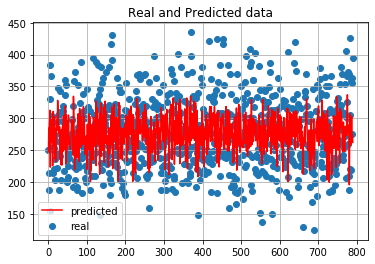

In [53]:
plt.grid();
plt.title("Real and Predicted data");
plt.scatter([x for x in range(len(y_test))],y_test, label = "real");
plt.plot([x for x in range(len(y_test))], model3.predict(X_test), c = 'r',label = "predicted");
plt.legend();

На графике заметен достаточно большой разброс значений

# DT

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
t1 = time()
model4 = DecisionTreeRegressor()
model4.fit(X_train,y_train)
pred4 = model4.predict(X_test)
r2_4 = model4.score(X_train,y_train)
r_4 = model4.score(X_test,y_test)
rmse_4 = mse(y_test,pred4,squared = False)
t2 = time()
t_4 = t2-t1
r2_train.append(r2_4)
r2_test.append(r_4)
rmse.append(rmse_4)
time_list.append(t_4)


# Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
t1 = time()
model6 = RandomForestRegressor(300,min_samples_leaf = 1)
model6.fit(X_train,y_train)
pred6 = model6.predict(X_test)
r2_6 = model6.score(X_train,y_train)
r_6 = model6.score(X_test,y_test)
rmse_6 = mse(y_test,pred6,squared = False)
t2 = time()
t_6 = t2-t1
r2_train.append(r2_6)
r2_test.append(r_6)
rmse.append(rmse_6)
time_list.append(t_6)

# Сравнение моделей

In [58]:
l_metr = [r2_train,r2_test,rmse,time_list]       
results = pd.DataFrame(data=l_metr,index=metrics, columns=models)
results.head(2).style.highlight_max(axis='columns')

,LinearRegression,RidgeCV,KNN,DecesionTree,RandomForest
R^2 on train,0.693883,0.693829,0.227604,1,0.964268
R^2 on test,0.669407,0.669446,0.163122,0.394633,0.724505


In [59]:
results.tail(2).style.highlight_min(axis='columns')

,LinearRegression,RidgeCV,KNN,DecesionTree,RandomForest
RMSE,32.4566,32.4547,51.6401,43.9203,29.6287
TIME,0.21642,0.0797591,0.110787,0.118685,11.445


Итак, в ходе работы был проведен описательный анализ для датасета по Прогнозирование частоты сердечных заболеваний в США. Была проведена очистка от аномалий, были заполнены пропущенные значения, удалены признаки, содержащие большое количество пропусков. Также была построена корреляционная матрица числовых признаков. Очень сильных зависимостей обнаруженно не было. В конце работы были рассмотрены основные модели регрессии, которые сравнивались по 4 метрикам - коэффициент детерминации по тренирововчной и тестовой выборке, rmse, время. Выбор метрик обусловлен следующим:

Коэффициент детерминации одна из наиболее популярных метрик. Брал по тренировочным и тестовым тк возможен случай, когда на тренировочных модель показывает шикарное значение, а на тестовом наборе R^2 мал. Пример - модель дерева решений в данной работе. 

RMSE - одна из основных метрик регрессии, если бы таргетные значения были очень большими, как в задаче по оценке активов, где цены достигают миллионы, лучше было использовать msle - средняя логарифмическая ошибка. 

Время - если модель будет работать очень долго, то модель не совсем хороша.

По сравнению моделей. Лучшей является модель случайного леса, имеющая наименьшую среднюю квадратичную ошибку, наибольший коэффициент детерминации по тесту. Несомненно, модель можно еще улучшить. Подобрать гиперпараметры для случайного леса. Еще раз взглянуть ну диаграммы рассеяния признаков для приведения признаков к линейности. Также можно попробовать разбиение на кластеры и взять среднее по ним. 

Пример поиска гиперпараметров при помощи Grid Search приведен в модели Knn, однако данная модель показала худшие результаты и полностью не подходит для данного датасета


В завершении работы взглянем на важность регрессоров в модели случайного леса

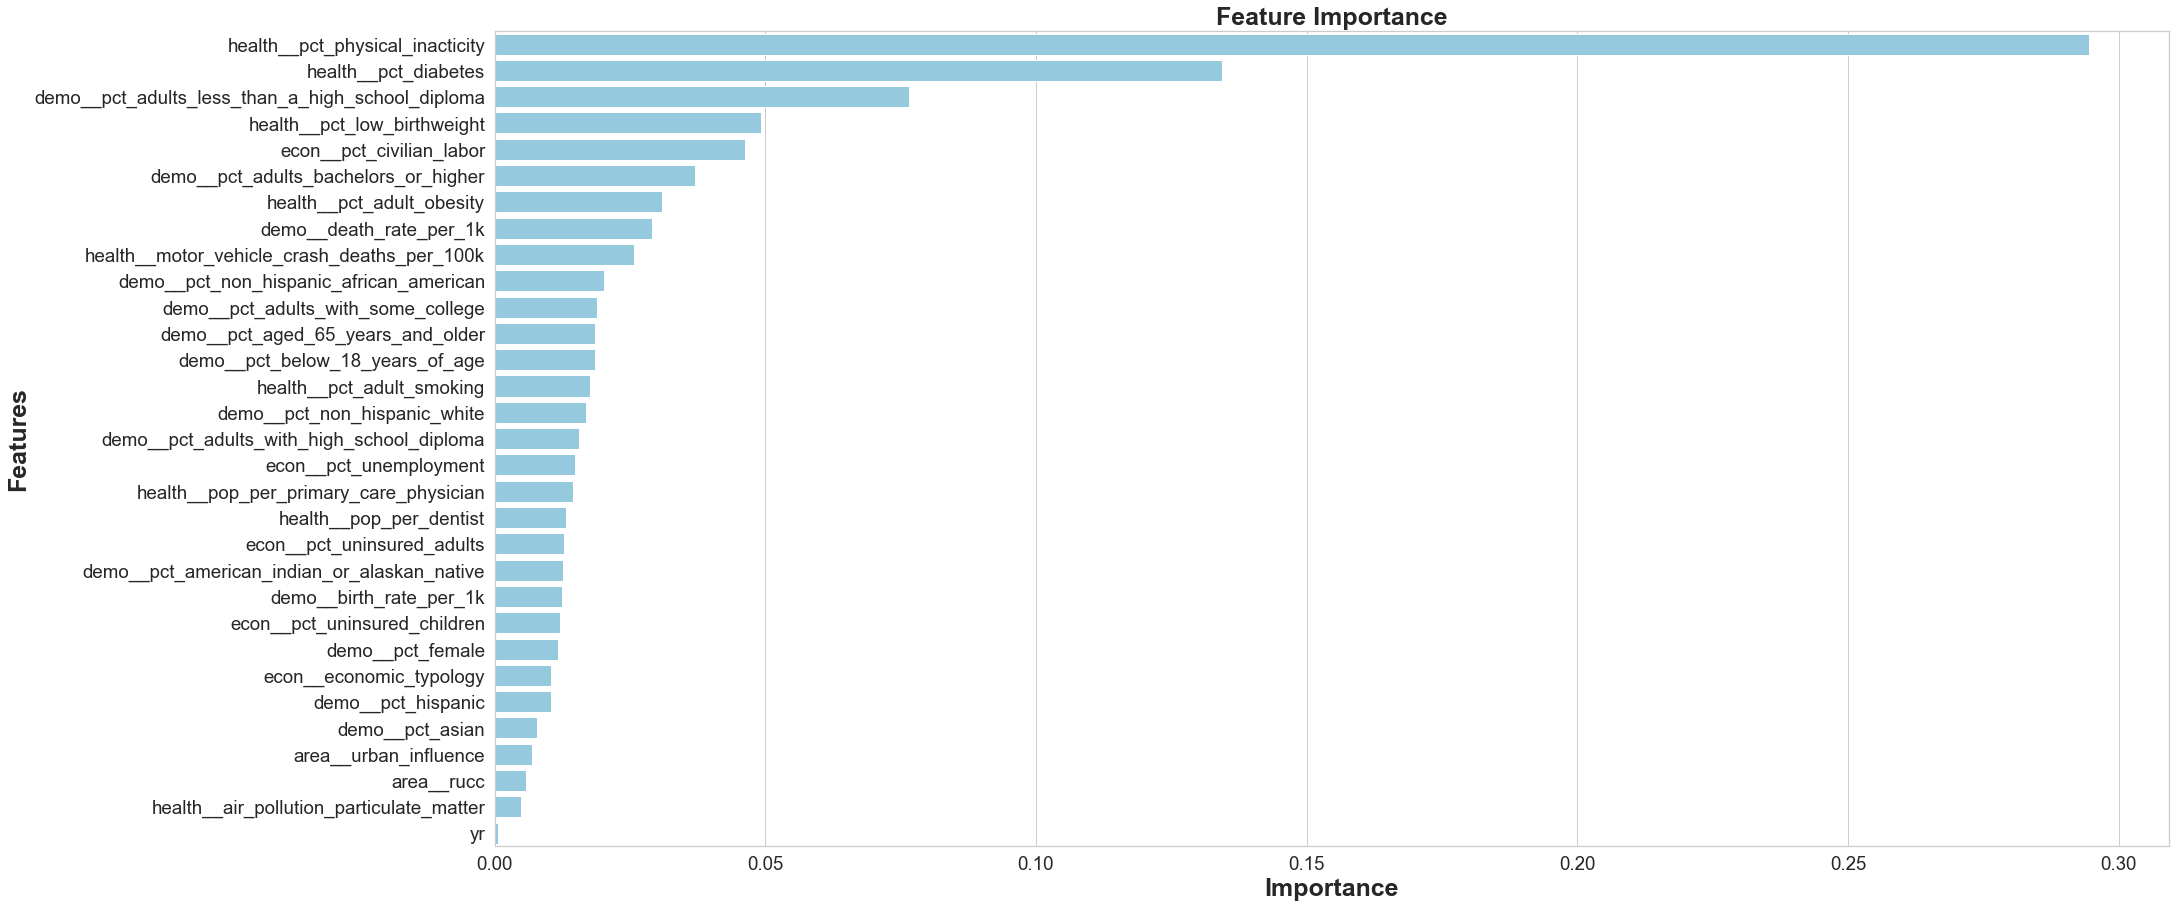

None

,Features,Gini-Importance
0,health__pct_physical_inacticity,0.294529
1,health__pct_diabetes,0.134437
2,demo__pct_adults_less_than_a_high_school_diploma,0.076560
3,health__pct_low_birthweight,0.049279
4,econ__pct_civilian_labor,0.046187
5,demo__pct_adults_bachelors_or_higher,0.036950
6,health__pct_adult_obesity,0.030827
7,demo__death_rate_per_1k,0.029004
8,health__motor_vehicle_crash_deaths_per_100k,0.025692
9,demo__pct_non_hispanic_african_american,0.020185


0.9361081123352051


In [61]:
t1 = time()
feats = {}
for feature, importance in zip(X.columns, model6.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)
t2 = time()
print(t2-t1)